In [1]:
import json
with open('lmg_pretrained_pipeline_v2.json', 'r') as f:
    data = json.load(f)

In [4]:
import matplotlib.pyplot as plt
from statistics import mean, stdev

bce_weights = sorted([i['parameters']['bce_weight'] for i in data])

def statistics_per_key(list_of_dict):
    keys = list_of_dict[0].keys()
    result = {}
    for key in keys:
        result[key] = [mean([i[key] for i in list_of_dict]), stdev([i[key] for i in list_of_dict])]
    return result

result = []
for bce in bce_weights:
    trials = sum([i['trials'] for i in data if i['parameters']['bce_weight'] == bce], [])
    datas = []
    for trial in trials:
        for epoch in trial:
            datas.append(epoch['data'])
    result.append({'bce_weight': bce, 'statistics': statistics_per_key(datas)})
    


sensitivity
[0.45677830815315246, 0.4975438594818115, 0.47878788053989413, 0.4884848487377167, 0.5362679433822631]
[0.07500677099257991, 0.06116740575401344, 0.09390043558016233, 0.07881101007134819, 0.08670732852445102]
specificity
[0.9836431765556335, 0.9810854578018189, 0.9825977873802185, 0.9815001344680786, 0.9734506535530091]
[0.005526763425484383, 0.005692606269339505, 0.006575701393694395, 0.007312650933221228, 0.010720626951657295]
accuracy
[0.9563555240631103, 0.9560416293144226, 0.9565042138099671, 0.9559656357765198, 0.9508078694343567]
[0.0041343716738564155, 0.004969436834504765, 0.004310527675351594, 0.004781270096448642, 0.007433570106858237]
precision
[0.6119464206695556, 0.5976957261562348, 0.6103387320041657, 0.60270538687706, 0.5406099104881287]
[0.06541731431797237, 0.07221064851512735, 0.06497421085052245, 0.06653803348624475, 0.0812906295287522]
mcc
[0.5041199744939782, 0.5207671320995344, 0.5146091671238225, 0.5166505306289662, 0.5086702168043855]
[0.04919152606

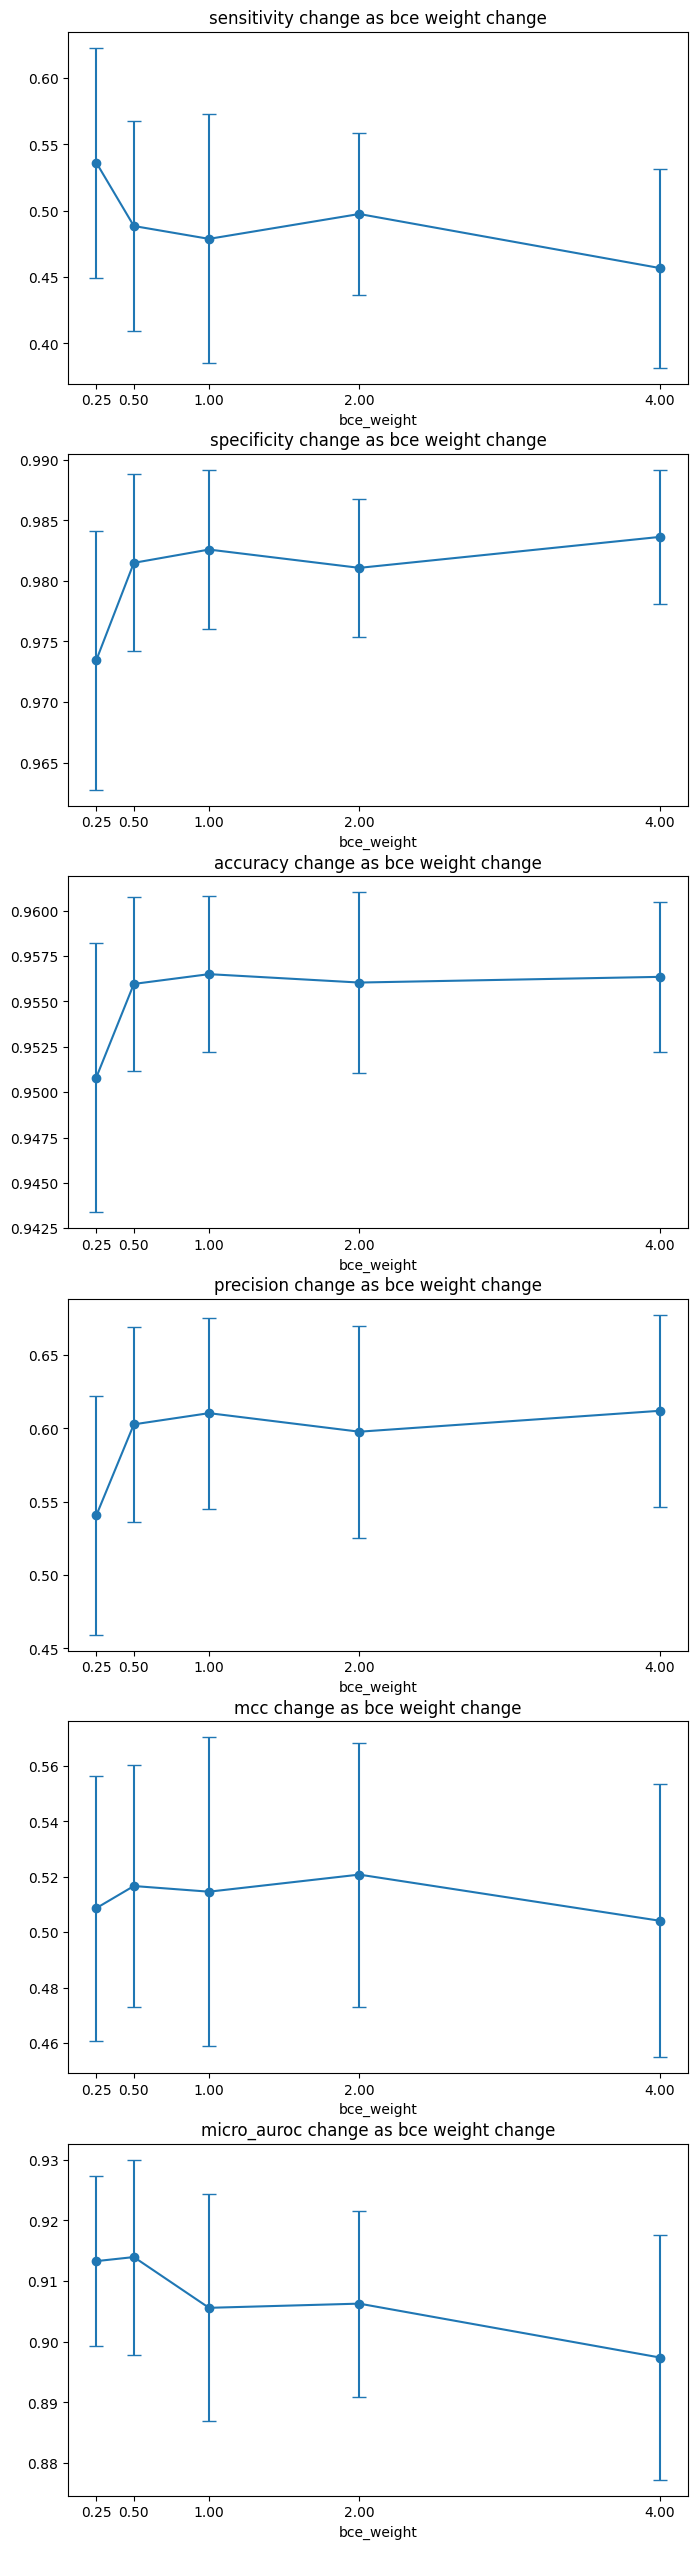

In [13]:
import matplotlib.pyplot as plt

bce_weights = [i['parameters']['bce_weight'] for i in data]

metrics = ['sensitivity', 'specificity', 'accuracy', 'precision', 'mcc', 'micro_auroc']

fig, axs = plt.subplots(6, figsize=(8, 32))

for metric, ax in zip(metrics, axs):
    print(metric)
    metric_avg = [i['statistics'][metric][0] for i in result]
    metric_std = [i['statistics'][metric][1] for i in result]
    print(metric_avg)
    print(metric_std)
    ax.errorbar(bce_weights, metric_avg, yerr=metric_std, fmt='-o', capsize=5)
    ax.set_title(f'{metric} change as bce weight change')
    ax.set_xlabel('bce_weight')
    ax.set_xticks(bce_weights)